# Bank Customers Database

## Data 

1. CLIENTNUM : Client number. Unique identifier for the customer holding the account
2. Attrition_Flag :  Internal event (customer activity) variable - if the account is closed then 1 else 0
3. Customer_Age: Demographic variable - Customer's Age in Years
4. Gender: M=Male, F= Female
5. Dependent_count: Demographic variable - Number of dependents
6. Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
7. Marital_Status: Demographic variable - Married, Single, Divorced, Unknown
8. Income_Category: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >)
9. Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
10. Months_on_book: Period of relationship with bank
11. Total_Relationship_Count: Total no. of products held by the customer
12. Months_Inactive_12_mon: No. of months inactive in the last 12 months
13. Contacts_Count_12_mon: No. of Contacts in the last 12 months
14. Credit_Limit: Credit Limit on the Credit Card
15. Total_Revolving_Bal: Total Revolving Balance on the Credit Card
16. Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
17. Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
18. Total_Trans_Amt: Total Transaction Amount (Last 12 months)
19. Total_Trans_Ct: Total Transaction Count (Last 12 months)
20. Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
21. Avg_Utilization_Ratio: Average Card Utilization Ratio


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Clean and fill any missing data

In [37]:
bank_df=pd.read_csv("BankChurners.csv")
#bank_df_1=pd.read_csv("BankChurners.csv")
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [38]:
bank_df_1 = pd.DataFrame({
    "Total_Trans_Amt": bank_df["Total_Trans_Amt"],
    "Education_Level": bank_df["Education_Level"],
    "Marital_Status": bank_df["Marital_Status"]
})

In [39]:
bank_df.drop("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",axis=1,inplace=True)


In [40]:
bank_df.drop("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",axis=1,inplace=True)

In [41]:
# Find the columns which contain strings
for label, content in bank_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Attrition_Flag
Gender
Education_Level
Marital_Status
Income_Category
Card_Category


In [42]:
# This will turn all of the string value into category values
for label, content in bank_df.items():
    if pd.api.types.is_string_dtype(content):
        bank_df[label] = content.astype("category").cat.as_ordered()

In [8]:
bank_df.Gender.cat.categories


Index(['F', 'M'], dtype='object')

In [9]:
bank_df["Income_Category"]

0           $60K - $80K
1        Less than $40K
2          $80K - $120K
3        Less than $40K
4           $60K - $80K
              ...      
10122       $40K - $60K
10123       $40K - $60K
10124    Less than $40K
10125       $40K - $60K
10126    Less than $40K
Name: Income_Category, Length: 10127, dtype: category
Categories (6, object): ['$120K +' < '$40K - $60K' < '$60K - $80K' < '$80K - $120K' < 'Less than $40K' < 'Unknown']

In [43]:
category_mapping = pd.DataFrame(columns=["Label", "Category"])
for label, content in bank_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        categories = content.unique()
        mapping = pd.DataFrame({"Label": label, "Category": categories})
        category_mapping = category_mapping.append(mapping, ignore_index=True)

C:\Users\91812\AppData\Local\Temp\ipykernel_27496\2229632886.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  category_mapping = category_mapping.append(mapping, ignore_index=True)
C:\Users\91812\AppData\Local\Temp\ipykernel_27496\2229632886.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  category_mapping = category_mapping.append(mapping, ignore_index=True)
C:\Users\91812\AppData\Local\Temp\ipykernel_27496\2229632886.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  category_mapping = category_mapping.append(mapping, ignore_index=True)
C:\Users\91812\AppData\Local\Temp\ipykernel_27496\2229632886.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [11]:
category_mapping

,Label,Category
0,Attrition_Flag,Existing Customer
1,Attrition_Flag,Attrited Customer
2,Gender,M
3,Gender,F
4,Education_Level,High School
5,Education_Level,Graduate
6,Education_Level,Uneducated
7,Education_Level,Unknown
8,Education_Level,College
9,Education_Level,Post-Graduate


In [12]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [13]:
bank_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [14]:
bank_df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## EDA

We have now seen that there are no missing or categorical data, Let's create a correlation matrix to find out which features correlate and can be analyzed 

### Correlation Matrix 

C:\Users\91812\AppData\Local\Temp\ipykernel_27496\3700911456.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=bank_df.corr()


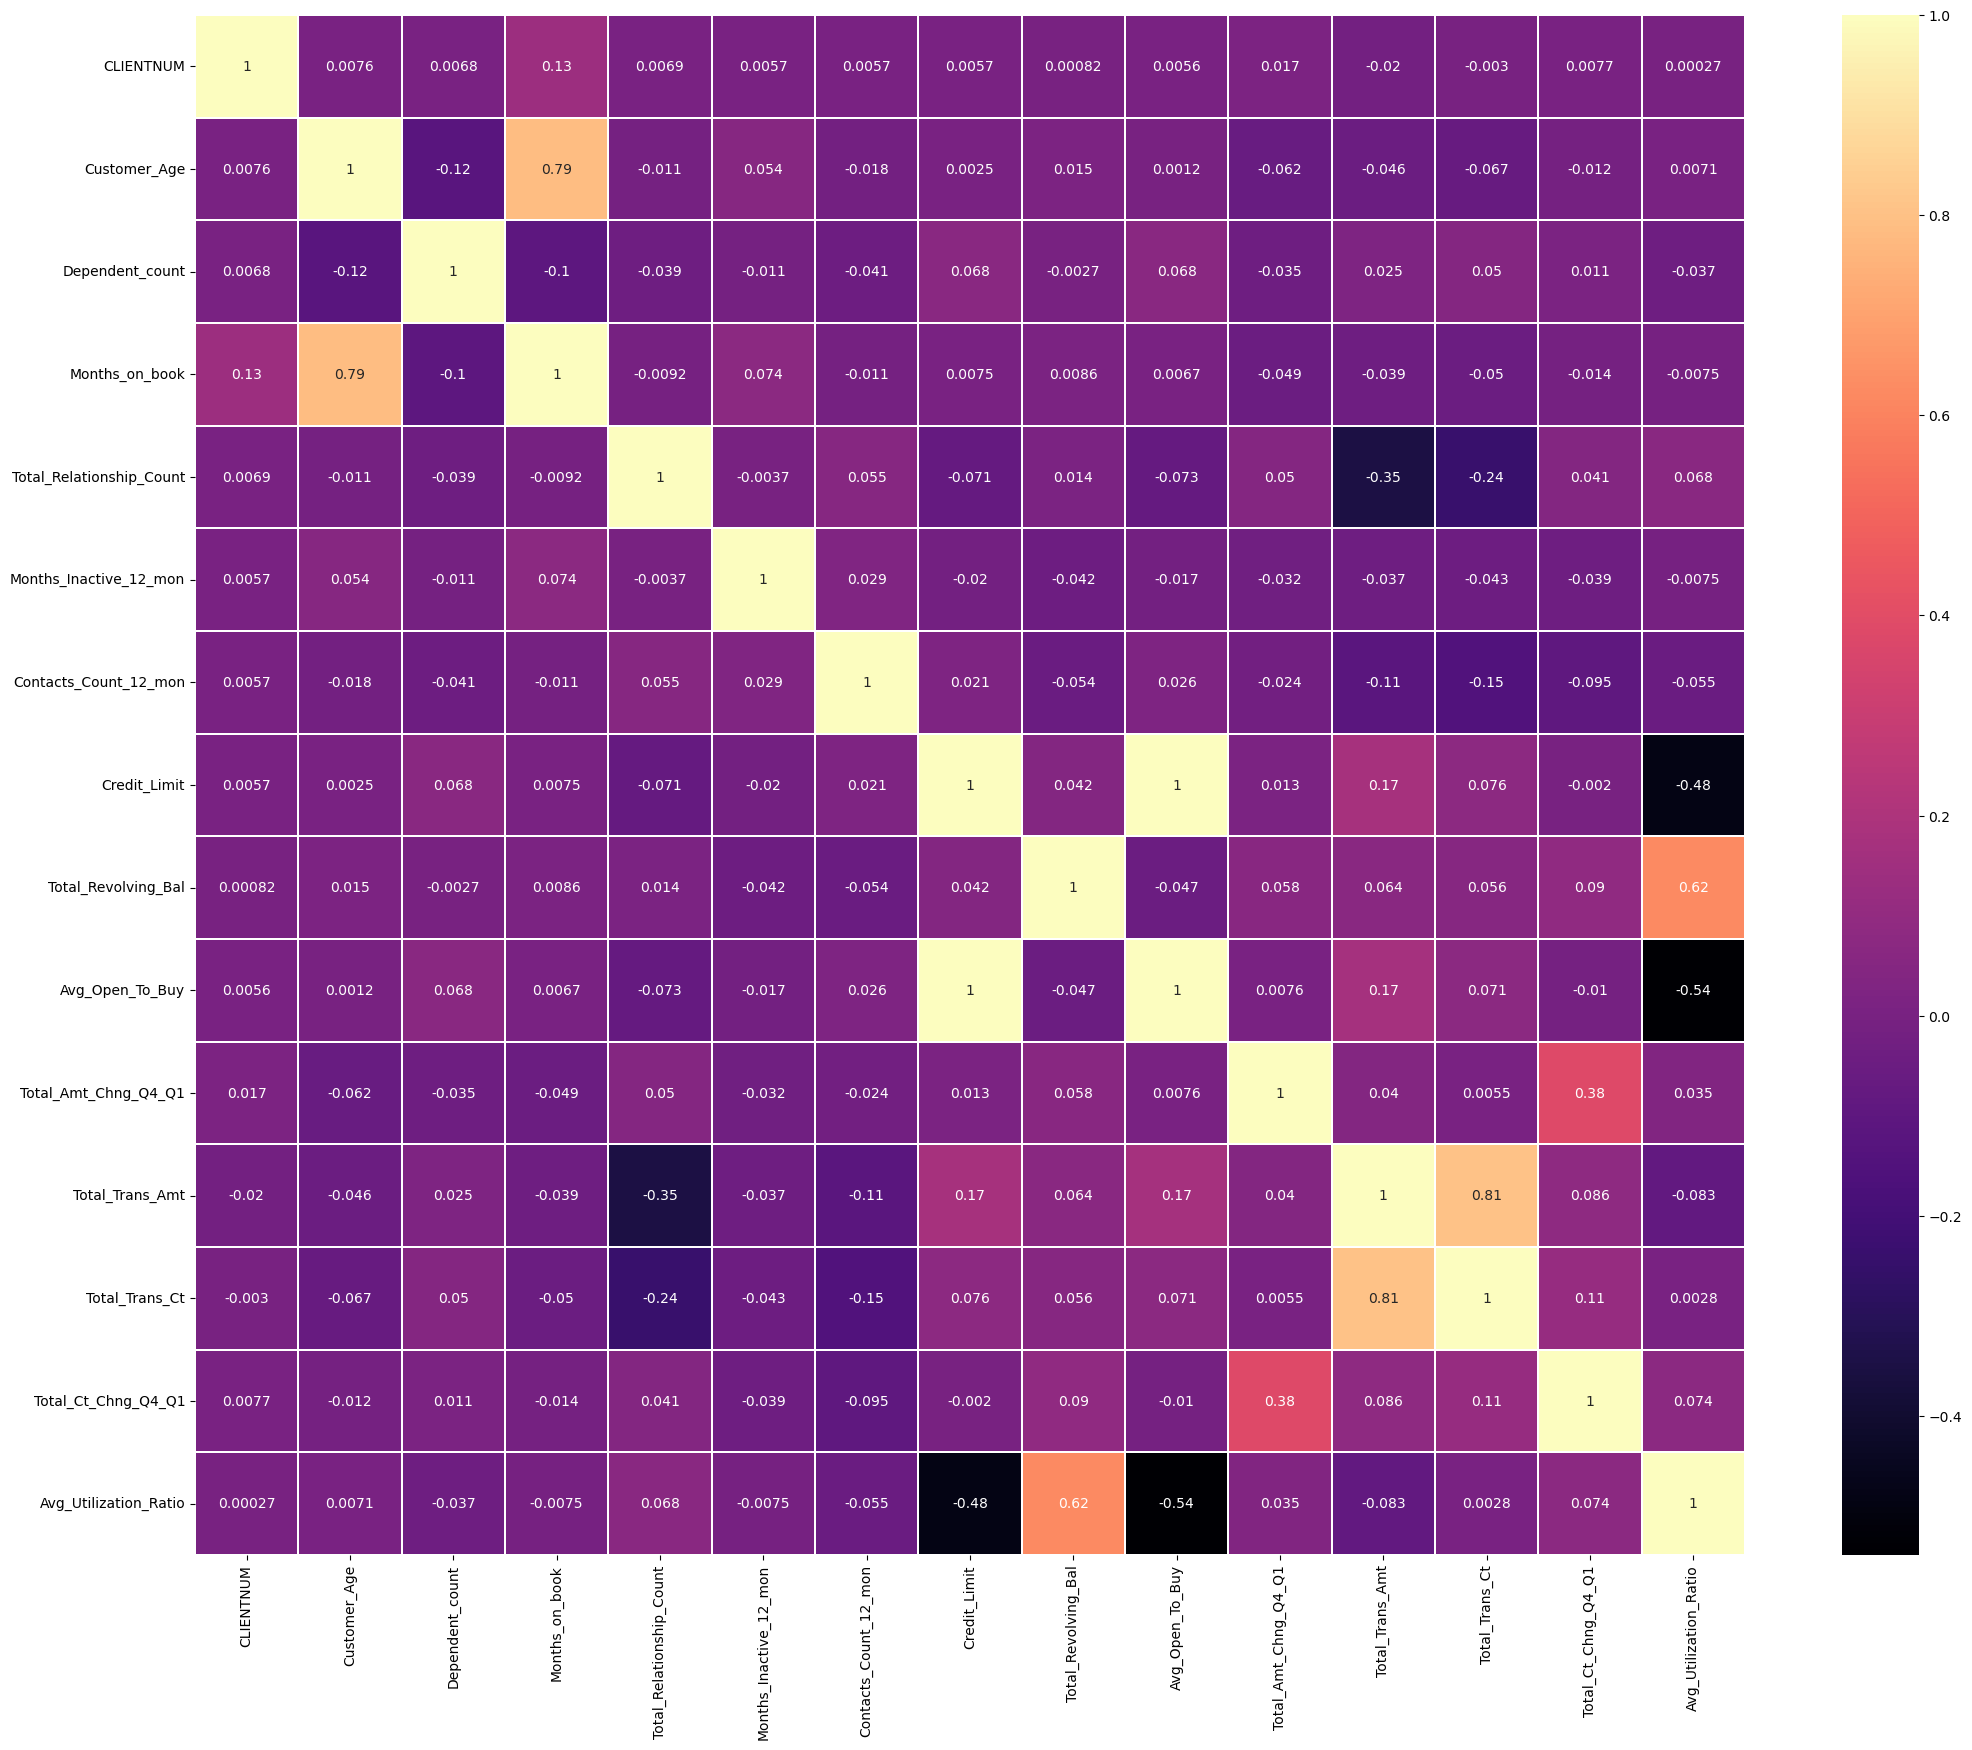

In [15]:
import matplotlib.pyplot as plt
import seaborn as sb
corr_matrix=bank_df.corr()

fig,ax=plt.subplots(figsize=(25,20))

ax=sb.heatmap(corr_matrix,
              annot=True,
              linewidths=.2,
              cmap="magma")

#### Customer Age v/s Total Transaction Amount v/s Average Utilization Ratio
Let us comapre the three categories to each other in different combinations

In [16]:
bank_df["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [17]:
np.ptp(bank_df["Total_Trans_Amt"])

17974

C:\Users\91812\AppData\Local\Temp\ipykernel_27496\401854388.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(yticklabels=np.arange(0, 1500000, 35000),


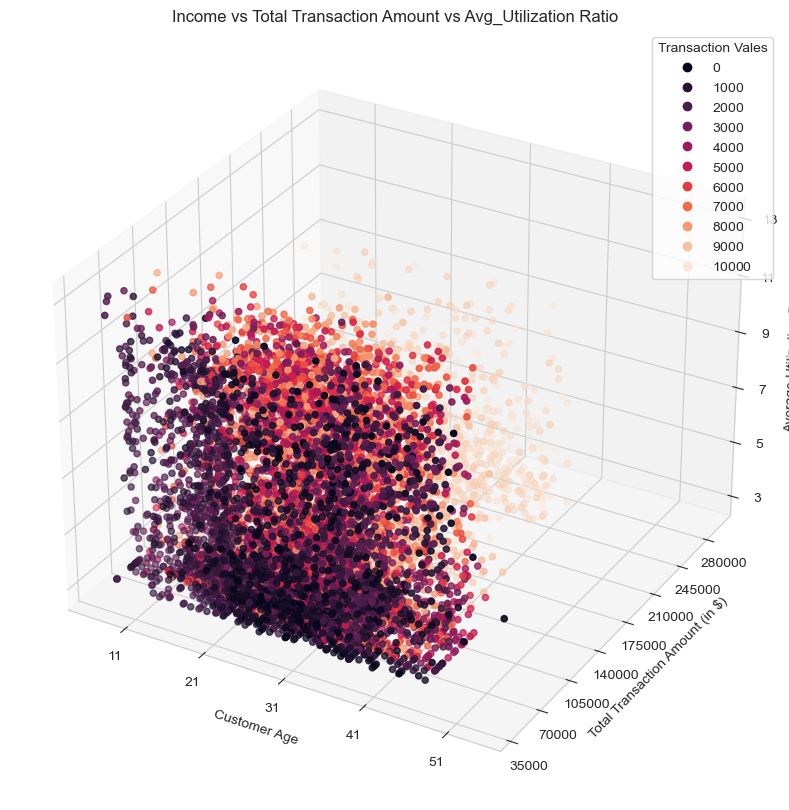

In [16]:
sns.set_style(style='whitegrid')
np.random.seed(19680801)
n = 100
rng = np.random.default_rng()
xs = bank_df["Customer_Age"]
ys = bank_df["Total_Trans_Amt"]
zs = bank_df["Avg_Utilization_Ratio"]
col = np.arange(bank_df["Customer_Age"].size)

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15, 10))
scatter = ax.scatter(xs, ys, zs, c=col, marker='o')

ax.set(yticklabels=np.arange(0, 1500000, 35000),
       xticklabels=np.arange(1, 100, 10),
       zticklabels=np.arange(1, 20, 2))

plt.title("Income vs Total Transaction Amount vs Avg_Utilization Ratio")
ax.set_xlabel("Customer Age")
ax.set_ylabel("Total Transaction Amount (in $)")
ax.set_zlabel("Average Utilization Ratios")
ax.legend(*scatter.legend_elements(), title="Transaction Vales")

plt.show()


We can see from the above cell that 

* As Income increases, then the total transaction amount as well as the average utilization amount increases
* The total transaction amount increases with increase in income
* Customers from age group 21-31 most underutilize the cards
* The cumtomers who utilize the most of the cards also are form a similar age group of 21-41 and their average utilization amount is moderate


## Gender vs Income Categories

In [17]:
pd.crosstab(bank_df["Gender"],bank_df["Income_Category"])

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
Gender,,,,,,
F,0,1014,0,0,3284,1060
M,727,776,1402,1535,277,52


<Axes: xlabel='Income_Category'>

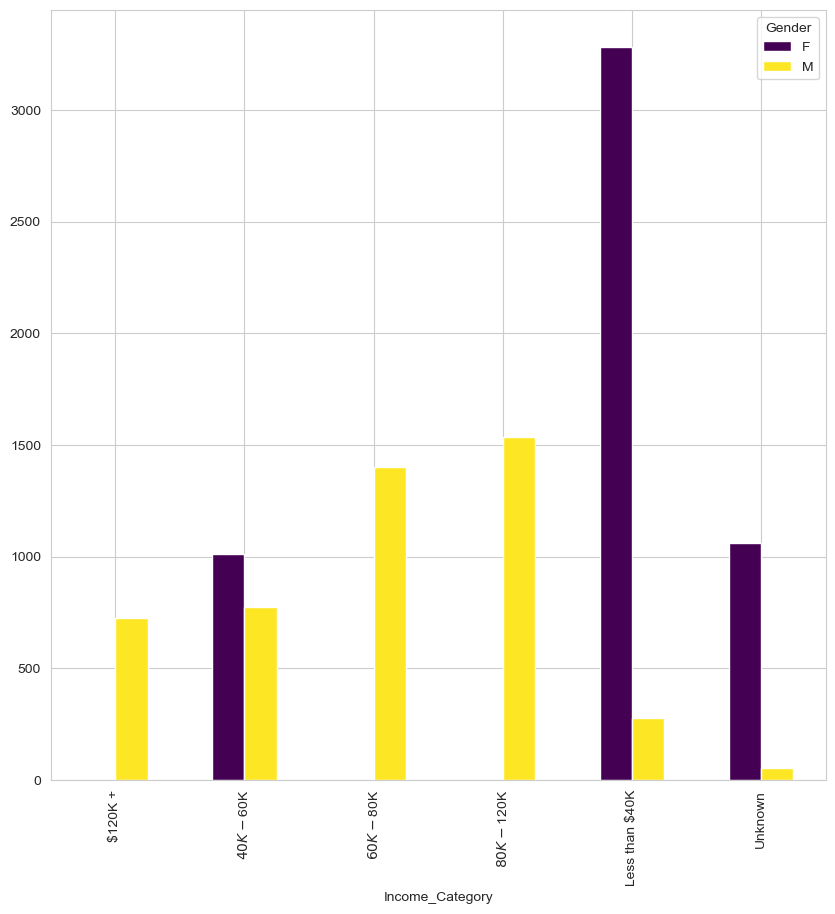

In [18]:
pd.crosstab(bank_df["Income_Category"],bank_df["Gender"]).plot(kind="bar",colormap="viridis",figsize=(10,10))

* We see that customers with highest income[>120k $] fall mostly [almost all] under male category
* Also, We see that customers with other income levels[60k-120k $] also fall mostly [almost all] under male category
* Customers from income category of [<40k $] is dominated by women


## Total Transaction Amount vs Various Features

In this section we will see how various features will compare against Total transaction amount

In [19]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [20]:
pd.crosstab(bank_df["Education_Level"],bank_df["Total_Trans_Amt"])

Total_Trans_Amt,510,530,563,569,594,596,597,602,615,643,...,17258,17350,17390,17437,17498,17628,17634,17744,17995,18484
Education_Level,,,,,,,,,,,,,,,,,,,,,
College,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doctorate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Graduate,0,0,0,1,0,1,1,1,0,0,...,0,0,1,1,1,0,0,0,1,0
High School,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
Post-Graduate,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
Uneducated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Unknown,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df=bank_df
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categoreis into numbers and add 1
        df[label]=pd.Categorical(content).codes+1

C:\Users\91812\AppData\Local\Temp\ipykernel_27496\1240481192.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(yticklabels=np.arange(0, 1500000, 35000),


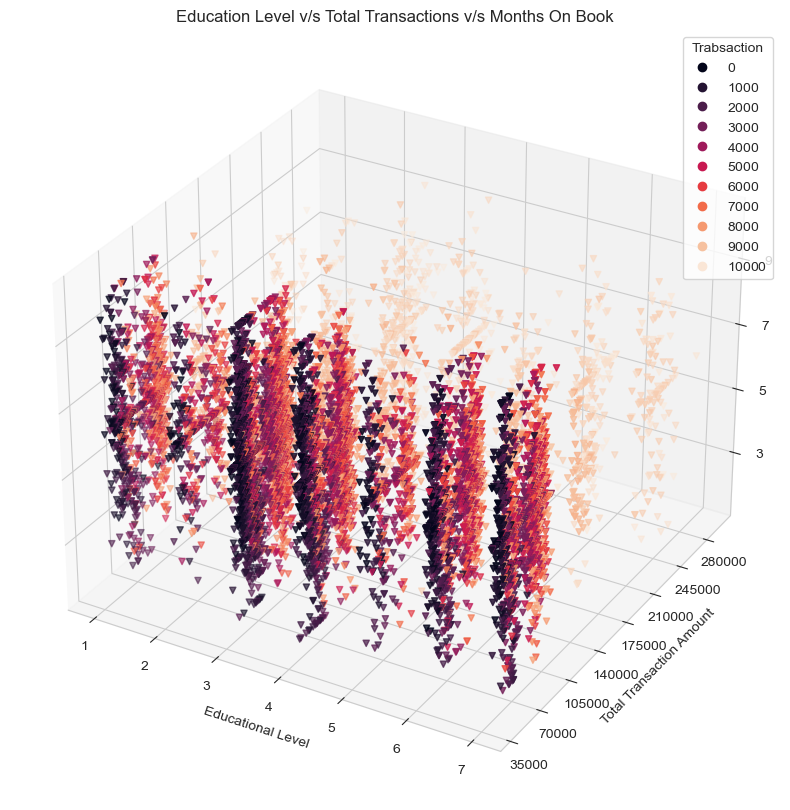

In [22]:
sns.set_style(style='whitegrid')
x=df["Education_Level"]

y=bank_df["Total_Trans_Amt"]
z=bank_df["Months_on_book"]


col=np.arange(bank_df["Attrition_Flag"].size)

fig,ax=plt.subplots(subplot_kw={"projection":"3d"},figsize=(10,10))


plotz=ax.scatter(x,y,z,c=col,marker='v')
ax.set_title("Education Level v/s Total Transactions v/s Months On Book")
ax.set_xlabel("Educational Level")
ax.set_ylabel("Total Transaction Amount")

ax.set(yticklabels=np.arange(0, 1500000, 35000),
       xticklabels=np.arange(0, 8, 1),
       zticklabels=np.arange(1, 50, 2))

ax.legend(*scatter.legend_elements(), title="Trabsaction")

plt.show()


plt.show()


#### Distribution Of Total Transaction Amount

C:\Users\91812\AppData\Local\Temp\ipykernel_27496\3672898131.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data= bank_df["Total_Trans_Amt"], kde = True, palette= 'magma')


TypeError: 'Axes' object is not subscriptable

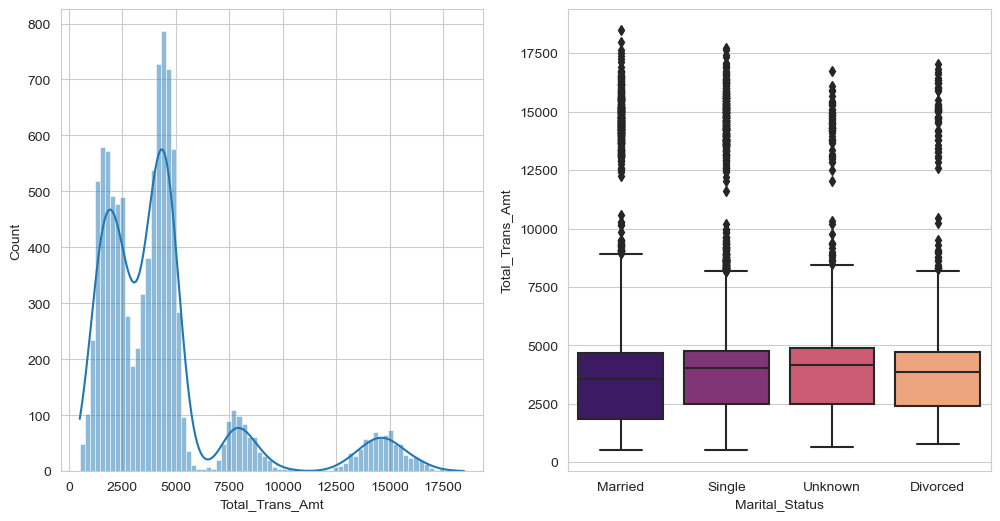

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.histplot(data= bank_df["Total_Trans_Amt"], kde = True, palette= 'magma')

plt.subplot(1,2,2)
sns.boxplot(sns.boxplot(data= bank_df_1, y = 'Total_Trans_Amt', x = 'Marital_Status', palette = "magma"))


plt.tight_layout()  # Adjust the spacing between subplots if needed
plt.show()

C:\Users\91812\AppData\Local\Temp\ipykernel_27496\200092589.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data= bank_df["Dependent_count"], kde = True, palette= 'magma')
C:\Users\91812\AppData\Local\Temp\ipykernel_27496\200092589.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data= bank_df["Card_Category"], kde = True, palette= 'magma')


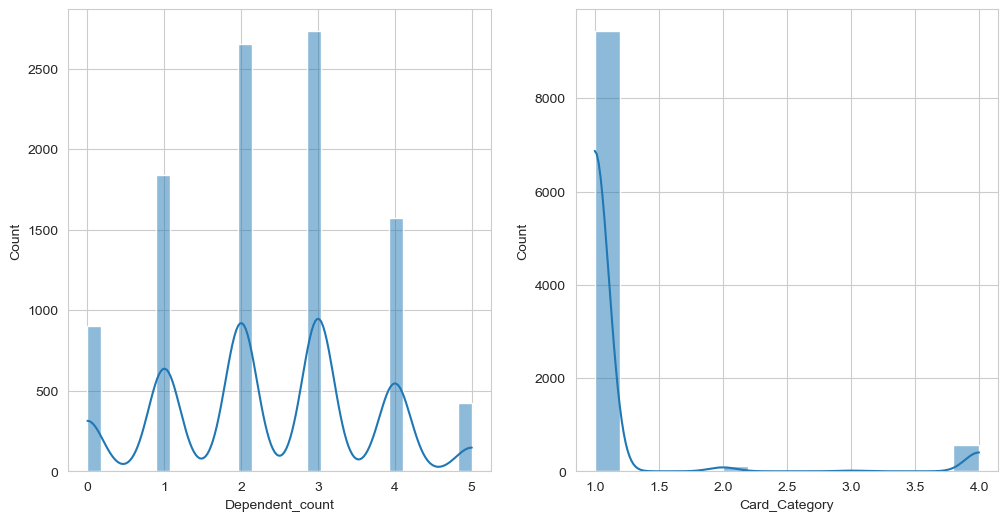

In [25]:

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(data= bank_df["Dependent_count"], kde = True, palette= 'magma')

plt.subplot(1, 2, 2)
sns.histplot(data= bank_df["Card_Category"], kde = True, palette= 'magma')

plt.show()

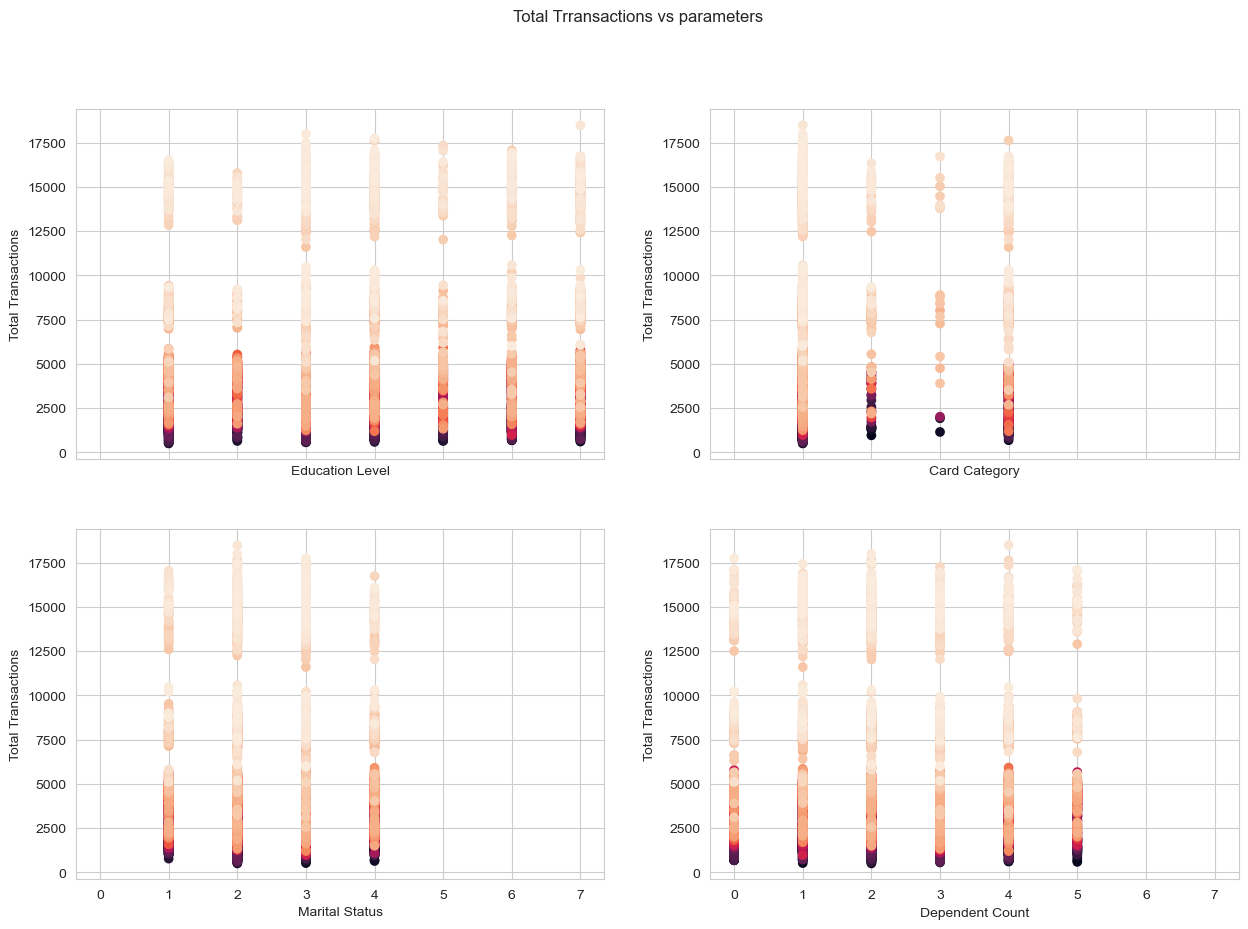

In [26]:
#import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True)

#ig.set_title("Total Trransactions vs parameters")

ax[0, 0].scatter(df["Education_Level"], y, c=col, marker="o")
ax[0, 0].set_xlabel("Education Level")
ax[0, 0].set_ylabel("Total Transactions")

ax[1, 0].scatter(df["Marital_Status"], y, c=col, marker="o")
ax[1, 0].set_xlabel("Marital Status")
ax[1, 0].set_ylabel("Total Transactions")

ax[0, 1].scatter(df["Card_Category"], y, c=col, marker="o")
ax[0, 1].set_xlabel("Card Category")
ax[0, 1].set_ylabel("Total Transactions")

ax[1, 1].scatter(df["Dependent_count"], y, c=col, marker="o")
ax[1, 1].set_xlabel("Dependent Count")
ax[1, 1].set_ylabel("Total Transactions")

fig.suptitle("Total Trransactions vs parameters")
plt.show()


##### From the above graphs we can conclude that
Total Transaction Amount :
* is the highest and also has the highest frequency amongst Platinum Cards
* is the highest amongst people with two or lower people who depend on them
* is the highest amongst married people and the least among divorced people


In [27]:
bank = df[bank_df["Total_Trans_Amt"] > 12500].copy()


### For viewing high value customrs

C:\Users\91812\AppData\Local\Temp\ipykernel_27496\250403241.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(yticklabels=np.arange(0, 1500000, 35000),


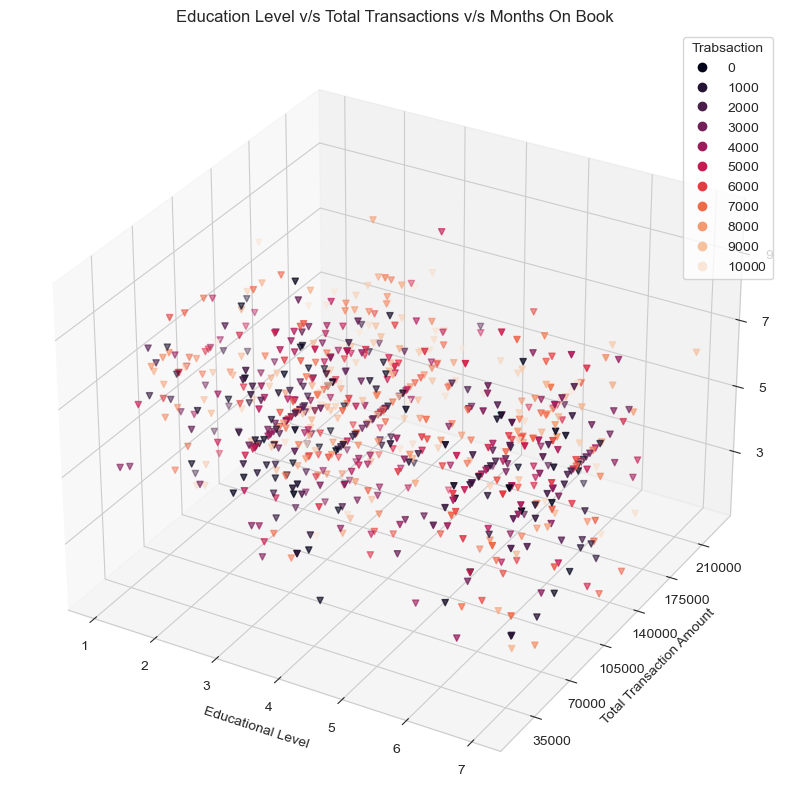

In [28]:
sns.set_style(style='whitegrid')
x=bank["Education_Level"]

y=bank["Total_Trans_Amt"]

z=bank["Months_on_book"]


col=np.arange(bank["Attrition_Flag"].size)

fig,ax=plt.subplots(subplot_kw={"projection":"3d"},figsize=(10,10))


plotz=ax.scatter(x,y,z,c=col,marker='v')
ax.set_title("Education Level v/s Total Transactions v/s Months On Book")
ax.set_xlabel("Educational Level")
ax.set_ylabel("Total Transaction Amount")

ax.set(yticklabels=np.arange(0, 1500000, 35000),
       xticklabels=np.arange(0, 8, 1),
       zticklabels=np.arange(1, 50, 2))

ax.legend(*scatter.legend_elements(), title="Trabsaction")

plt.show()


plt.show()


#### From the above Data we can conclude that

* College level educated and Unknown[Whose educational background is unknown] customers contribute to the biggest spends[Highest transactions].
* We see that graduate level educated peple and high schoolers contribute to more amount of spends while also being the least in value.
* We see that the education level v/s months on book, the graph is almost evenly spread.
* We also see that on the months on book v/s transaction scatter graph, the people ages between 30 & 40 spend the most.
* We also see that most people's total transaction amount is less than 7500$
* From the histogram distribution, we see that most number of peoplwe spend upto 5000$ on their total Transacted amount.

In [29]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 8968 to 10122
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 737 non-null    int64  
 1   Attrition_Flag            737 non-null    int8   
 2   Customer_Age              737 non-null    int64  
 3   Gender                    737 non-null    int8   
 4   Dependent_count           737 non-null    int64  
 5   Education_Level           737 non-null    int8   
 6   Marital_Status            737 non-null    int8   
 7   Income_Category           737 non-null    int8   
 8   Card_Category             737 non-null    int8   
 9   Months_on_book            737 non-null    int64  
 10  Total_Relationship_Count  737 non-null    int64  
 11  Months_Inactive_12_mon    737 non-null    int64  
 12  Contacts_Count_12_mon     737 non-null    int64  
 13  Credit_Limit              737 non-null    float64
 14  Total

In [44]:
bank_df["Attrition_Flag"].value_counts()


Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

## Machine Learning

* Predict the Attrition Rate value given other parameters, ie to check weather a person will prefer to stay with the company or leave
* Predict average utilization ratio given all otheeer pararmeters

In [55]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split,GridSearchCV,ShuffleSplit
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [58]:
# Turn catergorical variables into numbers and fill missing
for label,content in bank_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categoreis into numbers and add 1
        bank_df[label]=pd.Categorical(content).codes+1

In [62]:
y

0        2
1        2
2        2
3        2
4        2
        ..
10122    2
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int8

In [60]:
# To predict attrition Rate
X=bank_df.drop("Attrition_Flag",axis=1)
y=bank_df["Attrition_Flag"]
#Scaling the values
#scaler=MinMaxScaler()
#scaler.fit(X)
#X=scaler.fit_transform(X)
# Split the data into train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=200)

In [63]:
classifier_models={
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best','random']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50],
            'criterion': ['gini', 'entropy', 'log_loss']
        }
    },
    'ada_boost_classifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50,100]
        }
    },
    'gradient_boosting_classifier': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50,100],
        }
    },
    """'xbgclassifier': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [1,5,10,20,50]
        }
    },"""
    'cat_boost_calssifier': {
        'model': CatBoostClassifier(),
        'params': {
            'iterations':[1]
        }
    },
    'knn_classifier': {
        'model': KNeighborsClassifier(),
        'params': {
        }
    }
}

In [64]:
score=[]
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
for algo_name,mp in classifier_models.items():
    grid=GridSearchCV(mp['model'],mp['params'],cv=cv,return_train_score=False)
    grid.fit(X,y)
    score.append({
        'model':algo_name,
        'best_score':grid.best_score_,
        'best_params':grid.best_params_
    })

Learning rate set to 0.5
0:	learn: 0.3069514	total: 157ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.3070669	total: 9.09ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.3052920	total: 8.1ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.3116262	total: 6.97ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.3065408	total: 12.9ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.3005605	total: 13.4ms	remaining: 0us


In [66]:
score=pd.DataFrame(score,columns=['model','best_score','best_params'])
score

,model,best_score,best_params
0,logistic_regression,0.839191,{}
1,SVM,0.839191,{}
2,decision_tree,0.939092,"{'criterion': 'log_loss', 'splitter': 'best'}"
3,random_forest,0.962586,"{'criterion': 'gini', 'n_estimators': 50}"
4,ada_boost_classifier,0.962685,{'n_estimators': 100}
5,gradient_boosting_classifier,0.967423,{'n_estimators': 100}
6,'xbgclassifier': {\n 'model': XGBClassi...,0.903356,{'iterations': 1}
7,knn_classifier,0.816584,{}


In [71]:
#Imblanced the data set and create a function for the machine learning model
from imblearn.combine import SMOTETomek
sm=SMOTETomek()
#X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)
def model_buliding(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f'Accuracy score of the {model} is {accuracy_score(y_test,y_pred)*100:.2f}')
    print(classification_report(y_test,y_pred))
    confusion=confusion_matrix(y_test,y_pred)
    print(sns.heatmap(confusion,annot=True,cmap='magma'))

Learning rate set to 0.5
0:	learn: 0.3110372	total: 7.95ms	remaining: 0us
Accuracy score of the <catboost.core.CatBoostClassifier object at 0x000001CFC9451910> is 90.18
              precision    recall  f1-score   support

           1       0.75      0.54      0.63       313
           2       0.92      0.97      0.94      1713

    accuracy                           0.90      2026
   macro avg       0.84      0.75      0.79      2026
weighted avg       0.89      0.90      0.89      2026

Axes(0.125,0.11;0.62x0.77)


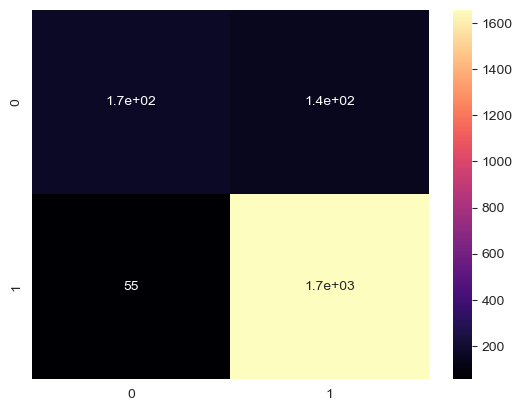

In [72]:
#Applying the Catboostclassifier
logistic=CatBoostClassifier(iterations=1)
model_buliding(logistic,X_train,X_test,y_train,y_test)

Accuracy score of the KNeighborsClassifier() is 81.89
              precision    recall  f1-score   support

           1       0.19      0.05      0.08       313
           2       0.85      0.96      0.90      1713

    accuracy                           0.82      2026
   macro avg       0.52      0.51      0.49      2026
weighted avg       0.75      0.82      0.77      2026

Axes(0.125,0.11;0.62x0.77)


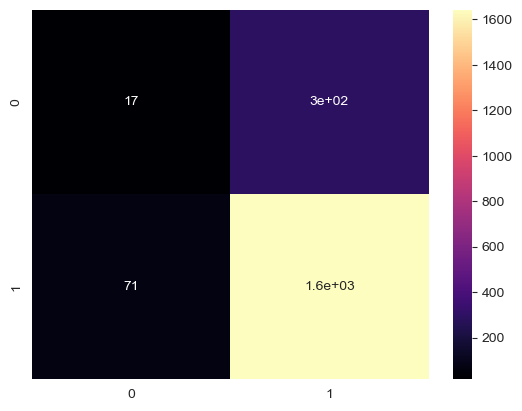

In [73]:
#Applying the Catboostclassifier
knn=KNeighborsClassifier()
model_buliding(knn,X_train,X_test,y_train,y_test)

Accuracy score of the GradientBoostingClassifier() is 96.40
              precision    recall  f1-score   support

           1       0.94      0.81      0.87       313
           2       0.97      0.99      0.98      1713

    accuracy                           0.96      2026
   macro avg       0.96      0.90      0.93      2026
weighted avg       0.96      0.96      0.96      2026

Axes(0.125,0.11;0.62x0.77)


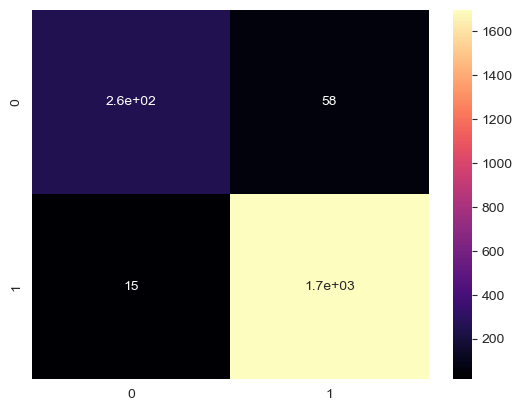

In [74]:
#Applying the Catboostclassifier
grad=GradientBoostingClassifier()
model_buliding(grad,X_train,X_test,y_train,y_test)

Accuracy score of the RandomForestClassifier() is 95.71
              precision    recall  f1-score   support

           1       0.92      0.79      0.85       313
           2       0.96      0.99      0.97      1713

    accuracy                           0.96      2026
   macro avg       0.94      0.89      0.91      2026
weighted avg       0.96      0.96      0.96      2026

Axes(0.125,0.11;0.62x0.77)


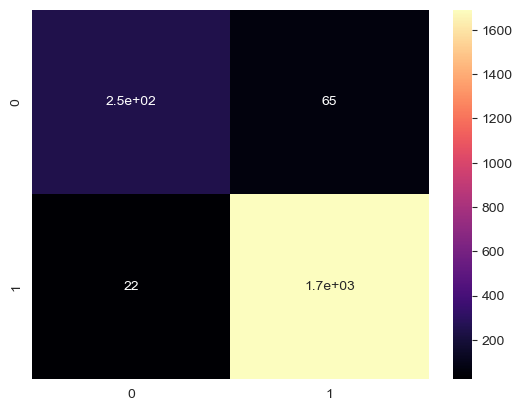

In [75]:
#Applying the Catboostclassifier
grad=RandomForestClassifier()
model_buliding(grad,X_train,X_test,y_train,y_test)

Accuracy score of the AdaBoostClassifier() is 95.46
              precision    recall  f1-score   support

           1       0.89      0.81      0.85       313
           2       0.97      0.98      0.97      1713

    accuracy                           0.95      2026
   macro avg       0.93      0.89      0.91      2026
weighted avg       0.95      0.95      0.95      2026

Axes(0.125,0.11;0.62x0.77)


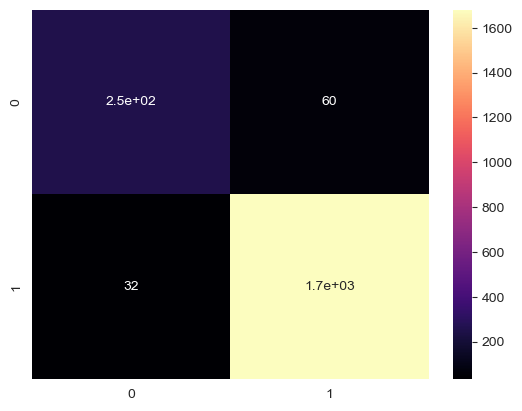

In [77]:
#Applying the Catboostclassifier
grad=AdaBoostClassifier()
model_buliding(grad,X_train,X_test,y_train,y_test)

## Conclusion

We can see that the RandomForestClassifier, AdaBoostClassifier and GradientBoostClassifiers are the best models for predicting attrition rate